## Importing packages

In [1]:
import cv2
import os


In [2]:
path = r"input path to your folder where dataset is"
# create a folder dataset and some folders inside it as shown in the repository 
# or download the folder as such and paste it in your local notebook directory

In [3]:
os.chdir(path)
os.chdir("dataset\standard_test_images")
print(os.getcwd())

C:\Users\Jiss\Amrita\SecondSem\19AI621 Computer Vision (Dr. Latha Parameswaran)\dataset\standard_test_images


## Task 2: Reading and Saving Image

In [4]:
# To read image from disk
img = cv2.imread("mandrill.jpg",0) # 0 -> read as grayscale


In [5]:
# Display an image in a window
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array

cv2.imshow('Mandrill', img)

# To hold the window on screen, use cv2.waitKey method
# Once it detected the close input, it will release the control
# To the next line
# First Parameter is for holding screen for specified milliseconds
# It should be positive integer. If 0 pass an parameter, then it will
# hold the screen until user close it.
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
    # It is for removing/deleting created GUI window from screen and memory

elif k == ord('s'): # wait for 's' key to save and exit
    os.chdir(path)
    os.chdir("output")
    cv2.imwrite('save_mandrill_gray.jpg',img)  # Saving the image
    cv2.destroyAllWindows()


## Properties of the image

In [6]:
print(type(img))

<class 'numpy.ndarray'>


In [7]:
print(img.shape)
print(type(img.shape))

(224, 225)
<class 'tuple'>


In [8]:
h, w = img.shape
print('Width of image:  ', w)
print('Height of image: ', h)

Width of image:   225
Height of image:  224


## Task 3: Interpolation

In [13]:
os.chdir(path)
os.chdir("dataset\standard_test_images")

Implementing Interpolation using Matplotlib:

In [70]:
import matplotlib.image as mpimg
import matplotlib.pylab as plab

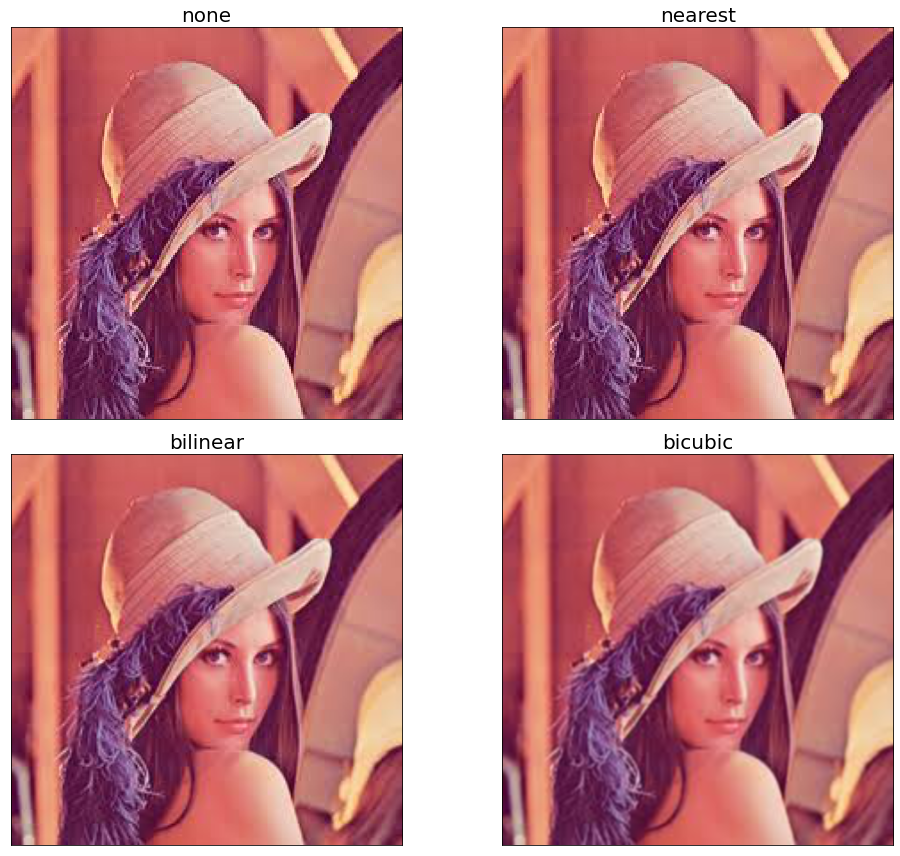

In [27]:
im = mpimg.imread("lena.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic']
fig, axes = plab.subplots(nrows=2, ncols=2, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plab.tight_layout()
plab.show()

Implementing Interpolation using PIL:

In [39]:
from PIL import Image

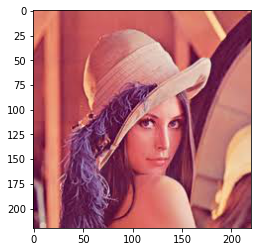

In [45]:
im = Image.open("lena.jpg")
plab.imshow(im)


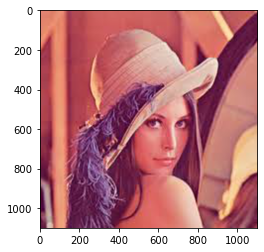

In [46]:
im_zero = im.resize((im.width*5, im.height*5))
plab.imshow(im_zero)


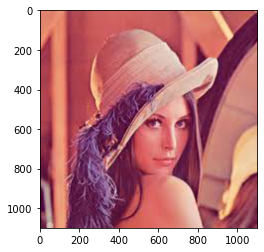

In [47]:
im_first = im.resize((im.width*5, im.height*5), Image.NEAREST)
plab.imshow(im_first)


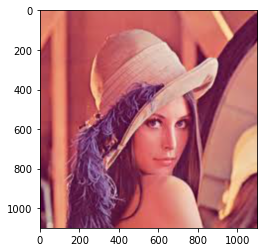

In [48]:
im_bili = im.resize((im.width*5, im.height*5), Image.BILINEAR)
plab.imshow(im_bili)


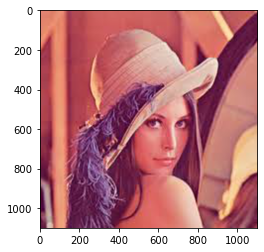

In [49]:
im_bicu = im.resize((im.width*5, im.height*5), Image.BICUBIC)
plab.imshow(im_bicu)


Implementing Interpolation using equation:

In [54]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def NN_interpolation(img,dstH,dstW): # Nearest Neighbour Interpolation
    scrH,scrW,_=img.shape
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=round((i+1)*(scrH/dstH))
            scry=round((j+1)*(scrW/dstW))
            retimg[i,j]=img[scrx-1,scry-1]
    return retimg

def BiLinear_interpolation(img,dstH,dstW):
    scrH,scrW,_=img.shape
    img=np.pad(img,((0,1),(0,1),(0,0)),'constant')
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=(i+1)*(scrH/dstH)-1
            scry=(j+1)*(scrW/dstW)-1
            x=math.floor(scrx)
            y=math.floor(scry)
            u=scrx-x
            v=scry-y
            retimg[i,j]=(1-u)*(1-v)*img[x,y]+u*(1-v)*img[x+1,y]+(1-u)*v*img[x,y+1]+u*v*img[x+1,y+1]
    return retimg

def BiBubic(x):
    x=abs(x)
    if x<=1:
        return 1-2*(x**2)+(x**3)
    elif x<2:
        return 4-8*x+5*(x**2)-(x**3)
    else:
        return 0

def BiCubic_interpolation(img,dstH,dstW):
    scrH,scrW,_=img.shape
    #img=np.pad(img,((1,3),(1,3),(0,0)),'constant')
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=i*(scrH/dstH)
            scry=j*(scrW/dstW)
            x=math.floor(scrx)
            y=math.floor(scry)
            u=scrx-x
            v=scry-y
            tmp=0
            for ii in range(-1,2):
                for jj in range(-1,2):
                    if x+ii<0 or y+jj<0 or x+ii>=scrH or y+jj>=scrW:
                        continue
                    tmp+=img[x+ii,y+jj]*BiBubic(ii-u)*BiBubic(jj-v)
            retimg[i,j]=np.clip(tmp,0,255)
    return retimg


os.chdir(path)
os.chdir("dataset\standard_test_images")
im_path="lena.jpg"

image=np.array(Image.open(im_path))

os.chdir(path)
os.chdir("output")

image1=NN_interpolation(image,image.shape[0]*2,image.shape[1]*2)
image1=Image.fromarray(image1.astype('uint8')).convert('RGB')
image1.save("lena_nearest.jpg")

image2=BiLinear_interpolation(image,image.shape[0]*2,image.shape[1]*2)
image2=Image.fromarray(image2.astype('uint8')).convert('RGB')
image2.save("lena_bilinear.jpg")

image3=BiCubic_interpolation(image,image.shape[0]*2,image.shape[1]*2)
image3=Image.fromarray(image3.astype('uint8')).convert('RGB')
image3.save("lena_cubic.jpg")

Implementing Interpolation using cv2:

In [64]:
os.chdir(path)
os.chdir("dataset\standard_test_images")

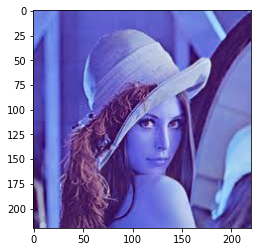

In [74]:
img = cv2.imread("lena.jpg")
plab.imshow(img)

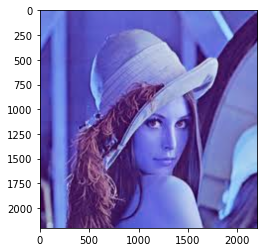

In [73]:
near_img = cv2.resize(img, None, fx = 10, fy = 10, interpolation = cv2.INTER_NEAREST)
plab.imshow(near_img)


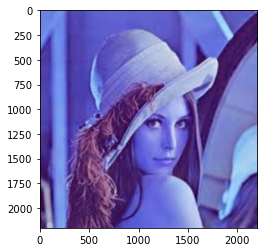

In [75]:
bilinear_img = cv2.resize(img,None, fx = 10, fy = 10, interpolation = cv2.INTER_LINEAR)
plab.imshow(bilinear_img)

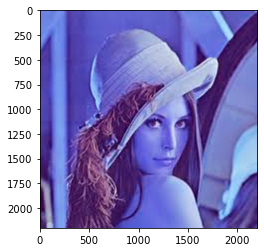

In [76]:
bicubic_img = cv2.resize(img,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
plab.imshow(bicubic_img)